<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#Style" data-toc-modified-id="Style-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Style</a></span></li><li><span><a href="#imports-and-data" data-toc-modified-id="imports-and-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>imports and data</a></span></li><li><span><a href="#Imports-for-reproducibility" data-toc-modified-id="Imports-for-reproducibility-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Imports for reproducibility</a></span></li><li><span><a href="#Custom-Imports" data-toc-modified-id="Custom-Imports-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Custom Imports</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Enable-GPU" data-toc-modified-id="Enable-GPU-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Enable GPU</a></span></li></ul></li><li><span><a href="#Cronus" data-toc-modified-id="Cronus-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cronus</a></span><ul class="toc-item"><li><span><a href="#Loss" data-toc-modified-id="Loss-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Loss</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Feature importance</a></span></li></ul></li><li><span><a href="#Hermes" data-toc-modified-id="Hermes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Hermes</a></span></li><li><span><a href="#Narcissus" data-toc-modified-id="Narcissus-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Narcissus</a></span></li></ul></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Predicting</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Cronus" data-toc-modified-id="Cronus-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cronus</a></span><ul class="toc-item"><li><span><a href="#Predict" data-toc-modified-id="Predict-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Predict</a></span></li><li><span><a href="#View-top" data-toc-modified-id="View-top-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>View top</a></span></li></ul></li><li><span><a href="#Hermes" data-toc-modified-id="Hermes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Hermes</a></span><ul class="toc-item"><li><span><a href="#Hermes-predict" data-toc-modified-id="Hermes-predict-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Hermes predict</a></span></li><li><span><a href="#View-top" data-toc-modified-id="View-top-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>View top</a></span></li></ul></li><li><span><a href="#Narcissus" data-toc-modified-id="Narcissus-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Narcissus</a></span><ul class="toc-item"><li><span><a href="#Predict" data-toc-modified-id="Predict-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Predict</a></span></li><li><span><a href="#View-top-prices" data-toc-modified-id="View-top-prices-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>View top prices</a></span></li></ul></li><li><span><a href="#Total-Prediction" data-toc-modified-id="Total-Prediction-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Total Prediction</a></span></li></ul></li></ul></div>

# Intro

## Style

In [1]:
USE_GPU = True
IGNORE_WARN = True
SEED = 42
import warnings
import matplotlib as mpl
mpl.rcParams['axes.titlesize']='xx-large'
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['axes.labelsize'] = 16

# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [2]:
if IGNORE_WARN:
    warnings.filterwarnings('ignore')

## imports and data

In [3]:
import os
import time
import shap
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from functools import partial
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Imports for reproducibility

In [4]:
import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

## Custom Imports

In [5]:
import importlib
import sys

if 'mlframe' in sys.modules:
    importlib.reload(sys.modules['mlframe'])
    importlib.reload(sys.modules['db'])

from db import DataBase
from mlframe import MLFrame
from modeling.create import NetworkCreator
from modeling.load import NetworkLoader

For convinent loading 'from mlframe import MLFrame


Using TensorFlow backend.


# Modeling

### Enable GPU

In [6]:
if USE_GPU:
    # Enable GPU
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
    os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

    # Show GPU
    print("Using GPU")
    print(tf.config.list_physical_devices('GPU'))
else:
    print("Using CPU")

Using GPU
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [176]:
# RELOAD CUSTOM PACKAGE
import importlib
from modeling import create
from modeling import load
importlib.reload(create)
importlib.reload(load)
from modeling import create
from modeling import load
NetworkCreator = create.NetworkCreator
NetworkLoader = load.NetworkLoader

## Cronus

```python
old_parameters = {
    'use_input_regularizer': 0,
     'input_neurons': 64,
     'input_dropout_rate': 0.1,
     'use_hidden_regularizer': 0,
     'hidden_dropout_rate': 0.0,
     'n_hidden_layers': 5,
     'hidden_neurons': 64,
     'patience': 100,
     'use_early_stopping': 0,
     'batch_size': 128,
     'input_regularizer_penalty': 0.05,
     'hidden_regularizer_penalty': 0.3
                 }
```

In [178]:
df_analyst = pd.read_pickle("./data/modeling/analyst.pkl")
df_prices = pd.read_pickle("./data/modeling/prices.pkl")
df_cronus = pd.concat([df_analyst, df_prices], axis=1)
X_cols = list(df_cronus.columns)
y_cols = list(df_prices.columns)
n_days = len(df_cronus)-1
name = 'Cronus'
cronus_loader = NetworkLoader(df_cronus, X_cols, y_cols, name, n_days)
cronus_loader.build_fit_predict(epochs=1000)

Preparing loader data
y is in x
Making creator
y is in x
INFO:tensorflow:Reloading Oracle from existing project E:/capstone/tuner_directory\Cronus\oracle.json
INFO:tensorflow:Reloading Tuner from E:/capstone/tuner_directory\Cronus\tuner0.json
Getting top hyper-parameters for: Cronus
Creator made
Loader complete
Building with Cronus
Fitting with Cronus
Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6162
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6108
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6045
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5941
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5840
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5701
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5493
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5381
Epoch 9/1000
1

1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 99/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.2582e-04
Epoch 100/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 101/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 102/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.5587e-04
Epoch 103/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 104/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.6831e-05
Epoch 105/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 106/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 107/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 108/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.5579e-05
Epoch 109/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 110/1000
1/1 [========

1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 297/1000
1/1 [==============================] - 0s 3ms/step - loss: 6.1721e-04
Epoch 298/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 299/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.3265e-04
Epoch 300/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 301/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 302/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 303/1000
1/1 [==============================] - 0s 3ms/step - loss: 9.1928e-04
Epoch 304/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.3484e-04
Epoch 305/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 306/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 307/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.5097e-04
Epoch 308/1000
1/1 [===

1/1 [==============================] - 0s 2ms/step - loss: 2.7350e-06
Epoch 494/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 495/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 496/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.8132e-04
Epoch 497/1000
1/1 [==============================] - 0s 3ms/step - loss: 4.7870e-06
Epoch 498/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.5994e-04
Epoch 499/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 500/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 501/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 502/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.8997e-04
Epoch 503/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.6284e-04
Epoch 504/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 505/1000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 3.5788e-04
Epoch 690/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.0217e-04
Epoch 691/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.4151e-05
Epoch 692/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.1854e-04
Epoch 693/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 694/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 695/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.1104e-04
Epoch 696/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.5306e-04
Epoch 697/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 698/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.1263e-05
Epoch 699/1000
1/1 [==============================] - 0s 3ms/step - loss: 6.0330e-05
Epoch 700/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.8099e-04
Epoch 7

1/1 [==============================] - 0s 2ms/step - loss: 2.5358e-04
Epoch 788/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.3130e-04
Epoch 789/1000
1/1 [==============================] - 0s 3ms/step - loss: 8.9171e-06
Epoch 790/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 791/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 792/1000
1/1 [==============================] - 0s 3ms/step - loss: 4.6525e-04
Epoch 793/1000
1/1 [==============================] - 0s 3ms/step - loss: 9.0729e-04
Epoch 794/1000
1/1 [==============================] - 0s 3ms/step - loss: 6.7526e-04
Epoch 795/1000
1/1 [==============================] - 0s 4ms/step - loss: 7.2991e-04
Epoch 796/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.6423e-05
Epoch 797/1000
1/1 [==============================] - 0s 3ms/step - loss: 4.6309e-04
Epoch 798/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.5841e-04
Epo

1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 983/1000
1/1 [==============================] - 0s 3ms/step - loss: 6.3970e-04
Epoch 984/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.2498e-04
Epoch 985/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.6610e-05
Epoch 986/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.0556e-05
Epoch 987/1000
1/1 [==============================] - 0s 3ms/step - loss: 7.6674e-04
Epoch 988/1000
1/1 [==============================] - 0s 3ms/step - loss: 7.3743e-04
Epoch 989/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.1164e-04
Epoch 990/1000
1/1 [==============================] - 0s 3ms/step - loss: 2.9231e-05
Epoch 991/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.5502e-04
Epoch 992/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 993/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.6516e-04
Epo

True

### Loss

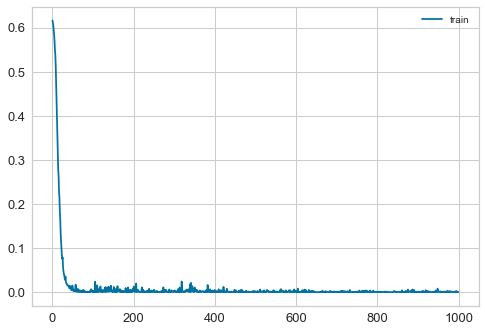

In [179]:
my_loss = cronus_loader.history.history['loss']
plt.plot(range(len(my_loss)),my_loss, label='train')
plt.legend()

### Feature importance

In [50]:
explainer = shap.GradientExplainer(cronus_loader.model, cronus_loader.data_gen.data)

In [52]:
shap_val = explainer.shap_values(cronus_loader.X.reshape(1, 346, 6579))

In [56]:
shap_val_copy = shap_val.copy()

In [59]:
shap_val = np.array(shap_val)

In [63]:
shap_val.shape

(387, 1, 346, 6579)

In [62]:
len(shap_val)

387

In [65]:
len(df_prices.columns)

387

In [136]:
shap_val[386][0,0].shape

(6579,)

In [148]:
shap_val[0,0].shape

(346, 6579)

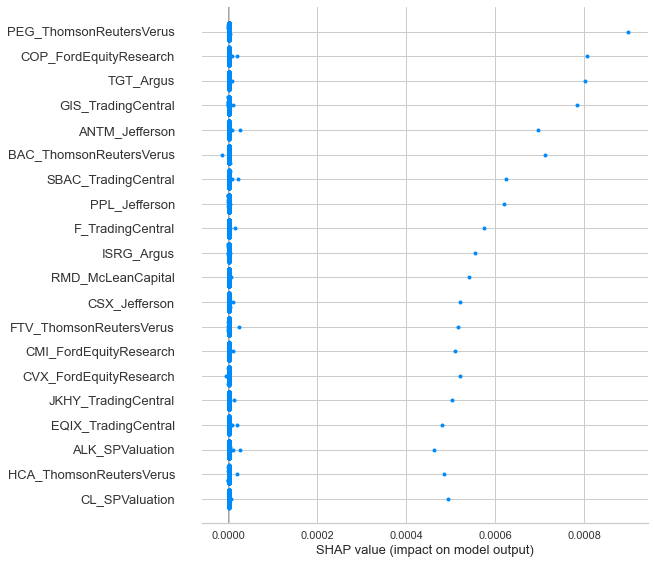

In [170]:
shap.summary_plot(shap_values=shap_val[0,0], feature_names=list(df_cronus.columns))

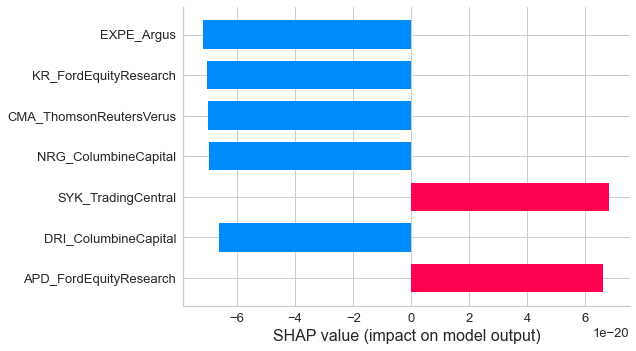

In [129]:
shap.bar_plot(shap_val[386][0,0], feature_names=(list(df_cronus.columns)))

<AxesSubplot:xlabel='date'>

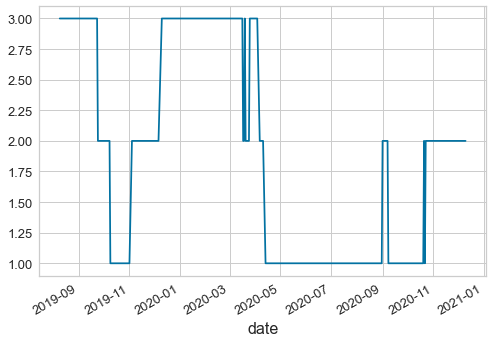

In [128]:
df_cronus['KR_FordEquityResearch'].plot()

In [118]:
len(df_cronus.columns)

6579

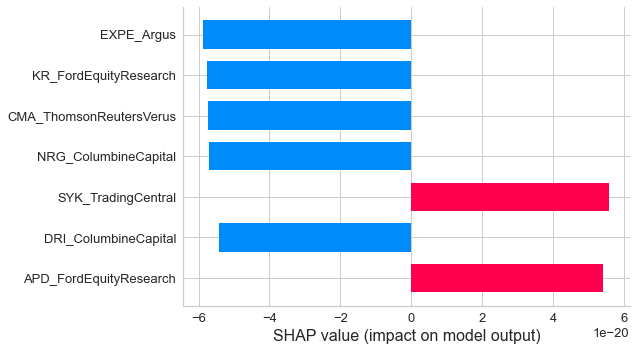

## Hermes

```python
old_parameters = {
    'use_input_regularizer': 0,
    'input_neurons': 64,
    'input_dropout_rate': 0.3,
    'use_hidden_regularizer': 0,
    'hidden_dropout_rate': 0.0,
    'n_hidden_layers': 3,
    'hidden_neurons': 64,
    'patience': 50,
    'use_early_stopping': 0,
    'batch_size': 32,
    'hidden_regularizer_penalty': 0.1,
    'input_regularizer_penalty': 0.01
                 }
```

In [270]:
df_hermes = pd.read_pickle("./data/modeling/hermes.pkl")
df_analyst = pd.read_pickle("./data/modeling/analyst.pkl")
X_cols = [col for col in df_hermes.columns
          if col not in df_analyst.columns]
y_cols = [col for col in df_hermes.columns
          if col in df_analyst.columns]
n_days = 3# len(df_hermes)-1
name = 'Hermes'
hermes_loader = NetworkLoader(df_hermes, X_cols, y_cols, name, n_days)
hermes_loader.build_fit_predict(epochs=1000,
                                fit_args=dict(
                                    callbacks=[]))

Preparing loader data
y is in dataframe but not x
Making creator
y is in dataframe but not x
INFO:tensorflow:Reloading Oracle from existing project E:/capstone/tuner_directory\Hermes\oracle.json
INFO:tensorflow:Reloading Tuner from E:/capstone/tuner_directory\Hermes\tuner0.json
Getting top hyper-parameters for: Hermes
Creator made
Loader complete
Building with Hermes
Fitting with Hermes
Epoch 1/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.3410
Epoch 2/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.2928
Epoch 3/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.2272
Epoch 4/1000
3/3 [==============================] - 0s 71ms/step - loss: 0.1575
Epoch 5/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1188
Epoch 6/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.1159
Epoch 7/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.1022
Epoch 8/1000
3/3 [==============================] 

Epoch 197/1000
3/3 [==============================] - 0s 72ms/step - loss: 0.0889
Epoch 198/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0889
Epoch 199/1000
3/3 [==============================] - 0s 73ms/step - loss: 0.0889
Epoch 200/1000
3/3 [==============================] - 0s 74ms/step - loss: 0.0890
Epoch 201/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0890
Epoch 202/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0890
Epoch 203/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0888
Epoch 204/1000
3/3 [==============================] - 0s 73ms/step - loss: 0.0889
Epoch 205/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0888
Epoch 206/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0887
Epoch 207/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0890
Epoch 208/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0889
Epoch 209/1000
3

3/3 [==============================] - 0s 77ms/step - loss: 0.0887
Epoch 397/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0886
Epoch 398/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0887
Epoch 399/1000
3/3 [==============================] - 0s 71ms/step - loss: 0.0887
Epoch 400/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0887
Epoch 401/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0886
Epoch 402/1000
3/3 [==============================] - 0s 72ms/step - loss: 0.0887
Epoch 403/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0887
Epoch 404/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0887
Epoch 405/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0888
Epoch 406/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0886
Epoch 407/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0887
Epoch 408/1000
3/3 [===========

3/3 [==============================] - 0s 66ms/step - loss: 0.0886
Epoch 497/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0886
Epoch 498/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0886
Epoch 499/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0886
Epoch 500/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0886
Epoch 501/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0886
Epoch 502/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0886
Epoch 503/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0886
Epoch 504/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0886
Epoch 505/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.0886
Epoch 506/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0886
Epoch 507/1000
3/3 [==============================] - 0s 73ms/step - loss: 0.0886
Epoch 508/1000
3/3 [===========

3/3 [==============================] - 0s 66ms/step - loss: 0.0885
Epoch 597/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0886
Epoch 598/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0885
Epoch 599/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0886
Epoch 600/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0885
Epoch 601/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0885
Epoch 602/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0886
Epoch 603/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0885
Epoch 604/1000
3/3 [==============================] - 0s 72ms/step - loss: 0.0886
Epoch 605/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0886
Epoch 606/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0885
Epoch 607/1000
3/3 [==============================] - 0s 77ms/step - loss: 0.0885
Epoch 608/1000
3/3 [===========

3/3 [==============================] - 0s 72ms/step - loss: 0.0885
Epoch 697/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0885
Epoch 698/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0885
Epoch 699/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0885
Epoch 700/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0885
Epoch 701/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0885
Epoch 702/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0885
Epoch 703/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0884
Epoch 704/1000
3/3 [==============================] - 0s 66ms/step - loss: 0.0885
Epoch 705/1000
3/3 [==============================] - 0s 74ms/step - loss: 0.0885
Epoch 706/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0885
Epoch 707/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0885
Epoch 708/1000
3/3 [===========

3/3 [==============================] - 0s 65ms/step - loss: 0.0885
Epoch 797/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0885
Epoch 798/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0885
Epoch 799/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0885
Epoch 800/1000
3/3 [==============================] - 0s 73ms/step - loss: 0.0885
Epoch 801/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0885
Epoch 802/1000
3/3 [==============================] - 0s 71ms/step - loss: 0.0885
Epoch 803/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.0885
Epoch 804/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.0886
Epoch 805/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.0885
Epoch 806/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0885
Epoch 807/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0886
Epoch 808/1000
3/3 [===========

3/3 [==============================] - 0s 70ms/step - loss: 0.0858
Epoch 897/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.0848
Epoch 898/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.0847
Epoch 899/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0837
Epoch 900/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.0823
Epoch 901/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0830
Epoch 902/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0809
Epoch 903/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0804
Epoch 904/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.0833
Epoch 905/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0812
Epoch 906/1000
3/3 [==============================] - 0s 69ms/step - loss: 0.0793
Epoch 907/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.0794
Epoch 908/1000
3/3 [===========

3/3 [==============================] - 0s 66ms/step - loss: 0.0658
Epoch 997/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0659
Epoch 998/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0640
Epoch 999/1000
3/3 [==============================] - 0s 70ms/step - loss: 0.0643
Epoch 1000/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0669
Predicting with Hermes


True

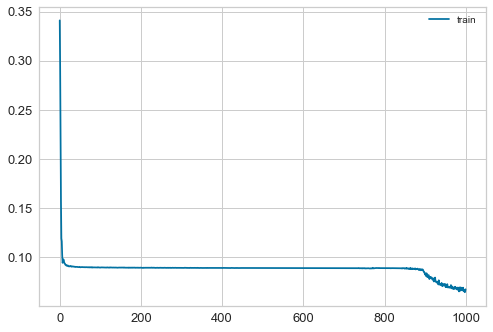

In [271]:
my_loss = hermes_loader.history.history['loss']
plt.plot(range(len(my_loss)),my_loss, label='train')
plt.legend()

## Narcissus

```python
old_parameters = {
    'use_input_regularizer': 2,
    'input_neurons': 64,
    'input_dropout_rate': 0.1,
    'use_hidden_regularizer': 0,
    'hidden_dropout_rate': 0.0,
    'n_hidden_layers': 3,
    'hidden_neurons': 64,
    'patience': 100,
    'use_early_stopping': 0,
    'batch_size': 128,
    'input_regularizer_penalty': 0.01,
    'hidden_regularizer_penalty': 0.05
                 }
```

In [182]:
df_performance = pd.read_pickle("./data/modeling/performance.pkl")
X_cols = list(df_performance.columns)
y_cols = X_cols
n_days = len(df_performance)-1
name = 'Narcissus'
narcissus_loader = NetworkLoader(df_performance, X_cols, y_cols, name, n_days)
narcissus_loader.build_fit_predict(epochs=1000)

Preparing loader data
y is the same as x
Making creator
y is the same as x
INFO:tensorflow:Reloading Oracle from existing project E:/capstone/tuner_directory\Narcissus\oracle.json
INFO:tensorflow:Reloading Tuner from E:/capstone/tuner_directory\Narcissus\tuner0.json
Getting top hyper-parameters for: Narcissus
Creator made
Loader complete
Building with Narcissus
Fitting with Narcissus
Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4450
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4435
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4406
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4373
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4320
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4274
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.4155
Epoch 8/1000
1/1 [==============================] - 0s 2ms/s

1/1 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 32/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0082
Epoch 33/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0065
Epoch 34/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 35/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 36/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 37/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 38/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 39/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 40/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0503
Epoch 41/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 42/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 43/1000
1/1 [==============================]

1/1 [==============================] - 0s 1000us/step - loss: 2.7028e-04
Epoch 63/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0169
Epoch 64/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0017
Epoch 65/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.1439e-04
Epoch 66/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0014
Epoch 67/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0017
Epoch 68/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 69/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 70/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 71/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 72/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 73/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 74/1000
1/1 [==============

Epoch 94/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 95/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.4309e-04
Epoch 96/1000
1/1 [==============================] - 0s 1000us/step - loss: 3.5678e-04
Epoch 97/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 98/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 99/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 100/1000
1/1 [==============================] - 0s 1000us/step - loss: 4.5347e-04
Epoch 101/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 102/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 103/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0052
Epoch 104/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.1889e-05
Epoch 105/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.7148e-04
Epoch

Epoch 125/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 126/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 127/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 128/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.5246e-04
Epoch 129/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.1552e-04
Epoch 130/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0044
Epoch 131/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 132/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.0401e-04
Epoch 133/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 134/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0015
Epoch 135/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0010
Epoch 136/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 137

1/1 [==============================] - 0s 1ms/step - loss: 5.0726e-06
Epoch 157/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.0345e-05
Epoch 158/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.0032e-04
Epoch 159/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0046
Epoch 160/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.6154e-04
Epoch 161/1000
1/1 [==============================] - 0s 1000us/step - loss: 5.2788e-05
Epoch 162/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 163/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 164/1000
1/1 [==============================] - 0s 998us/step - loss: 3.4599e-05
Epoch 165/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 166/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 167/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 168/1

Epoch 218/1000
1/1 [==============================] - 0s 999us/step - loss: 7.3288e-04
Epoch 219/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0035
Epoch 220/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 221/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 222/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 223/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0075
Epoch 224/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 225/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0081
Epoch 226/1000
1/1 [==============================] - 0s 1000us/step - loss: 1.6624e-04
Epoch 227/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0039
Epoch 228/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.3213e-04
Epoch 229/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0029


Epoch 249/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 250/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.5994e-05
Epoch 251/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.7414e-05
Epoch 252/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0061
Epoch 253/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0022
Epoch 254/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 255/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 256/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.8522e-06
Epoch 257/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 258/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.1610e-06
Epoch 259/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.1250e-04
Epoch 260/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0073


Epoch 280/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 281/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.4211e-04
Epoch 282/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.5543e-06
Epoch 283/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.0748e-05
Epoch 284/1000
1/1 [==============================] - 0s 974us/step - loss: 0.0013
Epoch 285/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 286/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0205
Epoch 287/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0011
Epoch 288/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 289/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 290/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0024
Epoch 291/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 292

Epoch 311/1000
1/1 [==============================] - 0s 999us/step - loss: 3.2037e-06
Epoch 312/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 313/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.5349e-05
Epoch 314/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 315/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0019
Epoch 316/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 317/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0122
Epoch 318/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0111
Epoch 319/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.3351e-04
Epoch 320/1000
1/1 [==============================] - 0s 1ms/step - loss: 8.6463e-04
Epoch 321/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.4905e-04
Epoch 322/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0054


1/1 [==============================] - 0s 2ms/step - loss: 7.7142e-06
Epoch 342/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.0641e-05
Epoch 343/1000
1/1 [==============================] - 0s 999us/step - loss: 4.7528e-04
Epoch 344/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.0713e-04
Epoch 345/1000
1/1 [==============================] - 0s 999us/step - loss: 5.6810e-04
Epoch 346/1000
1/1 [==============================] - 0s 998us/step - loss: 9.9749e-04
Epoch 347/1000
1/1 [==============================] - 0s 998us/step - loss: 1.5840e-04
Epoch 348/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.3172e-05
Epoch 349/1000
1/1 [==============================] - 0s 997us/step - loss: 5.9607e-06
Epoch 350/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.6653e-05
Epoch 351/1000
1/1 [==============================] - 0s 0s/step - loss: 9.6951e-04
Epoch 352/1000
1/1 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 2ms/step - loss: 3.6234e-04
Epoch 403/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 404/1000
1/1 [==============================] - 0s 1000us/step - loss: 2.5891e-05
Epoch 405/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.2372e-05
Epoch 406/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 407/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 408/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 409/1000
1/1 [==============================] - 0s 999us/step - loss: 5.4474e-05
Epoch 410/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.2770e-05
Epoch 411/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 412/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.1754e-04
Epoch 413/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 414/1000

1/1 [==============================] - 0s 2ms/step - loss: 3.3845e-05
Epoch 434/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 435/1000
1/1 [==============================] - 0s 999us/step - loss: 8.3885e-04
Epoch 436/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.9409e-04
Epoch 437/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.6434e-06
Epoch 438/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.5840e-05
Epoch 439/1000
1/1 [==============================] - 0s 2ms/step - loss: 7.1668e-04
Epoch 440/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.6949e-04
Epoch 441/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.3469e-04
Epoch 442/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 443/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.4069e-05
Epoch 444/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 8.8420e-04
Epoch 465/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.6098e-05
Epoch 466/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.3097e-04
Epoch 467/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.1916e-05
Epoch 468/1000
1/1 [==============================] - 0s 999us/step - loss: 4.1546e-04
Epoch 469/1000
1/1 [==============================] - 0s 1000us/step - loss: 7.0237e-04
Epoch 470/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.9142e-05
Epoch 471/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.1356e-04
Epoch 472/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.1746e-04
Epoch 473/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.5499e-04
Epoch 474/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.3491e-04
Epoch 475/1000
1/1 [==============================] - 0s 999us/step - loss:

1/1 [==============================] - 0s 1ms/step - loss: 7.2088e-06
Epoch 526/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.3290e-04
Epoch 527/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0016
Epoch 528/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 529/1000
1/1 [==============================] - 0s 997us/step - loss: 2.1406e-04
Epoch 530/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 531/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 532/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.6940e-04
Epoch 533/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.5899e-04
Epoch 534/1000
1/1 [==============================] - 0s 1000us/step - loss: 1.3607e-04
Epoch 535/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.7884e-05
Epoch 536/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.6312e-06
Epoc

1/1 [==============================] - 0s 1ms/step - loss: 3.2639e-04
Epoch 557/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0029
Epoch 558/1000
1/1 [==============================] - 0s 999us/step - loss: 2.8029e-04
Epoch 559/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.2831e-05
Epoch 560/1000
1/1 [==============================] - 0s 1000us/step - loss: 2.0791e-06
Epoch 561/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.3110e-05
Epoch 562/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.8708e-04
Epoch 563/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.2563e-06
Epoch 564/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 565/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.7888e-04
Epoch 566/1000
1/1 [==============================] - 0s 1ms/step - loss: 5.7377e-05
Epoch 567/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.1400

1/1 [==============================] - 0s 1000us/step - loss: 1.4941e-04
Epoch 588/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.7663e-04
Epoch 589/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0018
Epoch 590/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.2138e-04
Epoch 591/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.0442e-04
Epoch 592/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.9980e-04
Epoch 593/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.5511e-04
Epoch 594/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.2784e-05
Epoch 595/1000
1/1 [==============================] - 0s 1000us/step - loss: 7.7438e-05
Epoch 596/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.9012e-04
Epoch 597/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.2154e-04
Epoch 598/1000
1/1 [==============================] - 0s 1ms/step - loss: 7

1/1 [==============================] - 0s 1000us/step - loss: 1.0111e-05
Epoch 619/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.3722e-04
Epoch 620/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 621/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.9349e-04
Epoch 622/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0017
Epoch 623/1000
1/1 [==============================] - 0s 998us/step - loss: 8.3966e-04
Epoch 624/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.8548e-04
Epoch 625/1000
1/1 [==============================] - 0s 1000us/step - loss: 4.5620e-05
Epoch 626/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 627/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.2687e-04
Epoch 628/1000
1/1 [==============================] - 0s 1000us/step - loss: 1.9826e-04
Epoch 629/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.799

1/1 [==============================] - 0s 1ms/step - loss: 5.2215e-06
Epoch 650/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.9609e-06
Epoch 651/1000
1/1 [==============================] - 0s 1ms/step - loss: 5.7559e-06
Epoch 652/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0010
Epoch 653/1000
1/1 [==============================] - 0s 1ms/step - loss: 8.7286e-05
Epoch 654/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.7080e-05
Epoch 655/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.3259e-04
Epoch 656/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 657/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0114
Epoch 658/1000
1/1 [==============================] - 0s 1000us/step - loss: 5.6925e-04
Epoch 659/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0012
Epoch 660/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 

1/1 [==============================] - 0s 999us/step - loss: 4.4242e-04
Epoch 681/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.1616e-04
Epoch 682/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.6707e-05
Epoch 683/1000
1/1 [==============================] - 0s 1ms/step - loss: 5.4086e-04
Epoch 684/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.7925e-05
Epoch 685/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.8935e-05
Epoch 686/1000
1/1 [==============================] - 0s 999us/step - loss: 1.1825e-04
Epoch 687/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.0820e-04
Epoch 688/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.1046e-04
Epoch 689/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 690/1000
1/1 [==============================] - 0s 1000us/step - loss: 8.2033e-05
Epoch 691/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.7

1/1 [==============================] - 0s 1ms/step - loss: 4.4319e-06
Epoch 742/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.9268e-06
Epoch 743/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.8737e-05
Epoch 744/1000
1/1 [==============================] - 0s 999us/step - loss: 1.6899e-04
Epoch 745/1000
1/1 [==============================] - 0s 1ms/step - loss: 7.7130e-06
Epoch 746/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.6211e-05
Epoch 747/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.3767e-06
Epoch 748/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.6522e-04
Epoch 749/1000
1/1 [==============================] - 0s 2ms/step - loss: 7.9889e-06
Epoch 750/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.7182e-05
Epoch 751/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.1720e-05
Epoch 752/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.89

1/1 [==============================] - 0s 1ms/step - loss: 5.2492e-05
Epoch 803/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.4958e-06
Epoch 804/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.0305e-06
Epoch 805/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.5521e-05
Epoch 806/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.1078e-04
Epoch 807/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 808/1000
1/1 [==============================] - 0s 1000us/step - loss: 1.5513e-05
Epoch 809/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.1364e-05
Epoch 810/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.3879e-05
Epoch 811/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.1982e-06
Epoch 812/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.7191e-04
Epoch 813/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.5651e

1/1 [==============================] - 0s 998us/step - loss: 7.7293e-04
Epoch 864/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.1060e-05
Epoch 865/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0011
Epoch 866/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.1221e-04
Epoch 867/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.0661e-04
Epoch 868/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.6068e-05
Epoch 869/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 870/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.9887e-04
Epoch 871/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0032
Epoch 872/1000
1/1 [==============================] - 0s 999us/step - loss: 3.4150e-05
Epoch 873/1000
1/1 [==============================] - 0s 1ms/step - loss: 8.7798e-04
Epoch 874/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.4288e-04

1/1 [==============================] - 0s 969us/step - loss: 0.0012
Epoch 925/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.0974e-04
Epoch 926/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.7138e-04
Epoch 927/1000
1/1 [==============================] - 0s 2ms/step - loss: 8.1849e-04
Epoch 928/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.3922e-04
Epoch 929/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.1554e-04
Epoch 930/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.2070e-04
Epoch 931/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.8934e-04
Epoch 932/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.4382e-05
Epoch 933/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.9190e-06
Epoch 934/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.2366e-04
Epoch 935/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.3264e-

1/1 [==============================] - 0s 994us/step - loss: 2.0549e-04
Epoch 986/1000
1/1 [==============================] - 0s 999us/step - loss: 4.4445e-04
Epoch 987/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.3037e-04
Epoch 988/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.6931e-04
Epoch 989/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.7630e-05
Epoch 990/1000
1/1 [==============================] - 0s 1000us/step - loss: 2.9808e-04
Epoch 991/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.2093e-06
Epoch 992/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.2989e-06
Epoch 993/1000
1/1 [==============================] - 0s 998us/step - loss: 4.0897e-04
Epoch 994/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 995/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.4150e-06
Epoch 996/1000
1/1 [==============================] - 0s 2ms/step - loss: 4

True

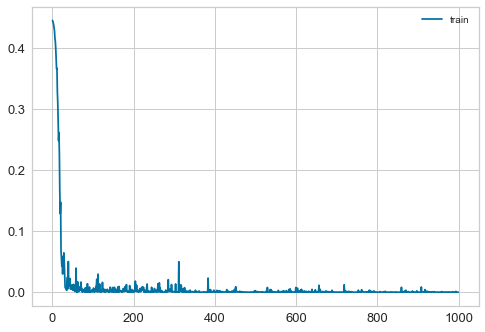

In [272]:
my_loss = narcissus_loader.history.history['loss']
plt.plot(range(len(my_loss)),my_loss, label='train')
plt.legend()

# Predicting

## Functions

In [273]:
df_company = pd.read_pickle("./data/modeling/company.pkl").reset_index()

In [262]:
def get_symbols_and_reindex(df, symbols):
    """
    Reindexes dataframe on date, where symbol is tied to the columns i.e
    
            sym   price  var
      5/22   A     12     5
      5/22   B     13     8
      
    BECOMES
          A_price   B_price   A_var   B_var
    5/22    12         13       5      8
    """
    new_dfs = []
    for sym in symbols:
        sym_df = df.loc[df['sym'] == sym]
        sym_df.drop('sym', axis=1, inplace=True)
        sym_df.columns = [f"{sym}_{col}" for col in sym_df.columns]
        new_dfs.append(sym_df.reset_index(drop=True))
    return pd.concat(new_dfs, axis=1)

In [263]:
company_symbols = df_company['sym'].unique()
df_company_ohe = get_symbols_and_reindex(
    MLFrame(df_company.set_index('sym',
                                 drop=True)).one_hot_encode().reset_index(),
    company_symbols)
df_company_ohe.head()

Added categorical columns
2 -> Exchange
10 -> sector
61 -> industry


,A_securityType_CSRT,A_sector_Consumer Discretionary,A_sector_Consumer Staples,A_sector_Energy,A_sector_Financials,A_sector_Health Care,A_sector_Industrials,A_sector_Information Technology,A_sector_Materials,A_sector_Real Estate,...,"ZTS_industry_Technology Hardware, Storage & Peripherals","ZTS_industry_Textiles, Apparel & Luxury Goods",ZTS_industry_Tobacco,ZTS_industry_Trading Companies & Distributors,ZTS_industry_Water Utilities,ZTS_industry_Wireless Telecommunication Services,ZTS_Exchange_NYSE,ZTS_Exchange_unknown,ZTS_DJIA_1,ZTS_NASDAQ100_1
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [264]:
df_hermes

,A_RevenueTTM,A_TotalCash,A_ExDividendDate,A_Dividend,A_DividendYield,A_PriceToBook,A_PriceToSales,A_EnterpriseValue,A_PriceToCashFlow,A_PE,...,"ZTS_subIndustry_Technology Hardware, Storage & Peripherals",ZTS_subIndustry_Tobacco,ZTS_subIndustry_Trading Companies & Distributors,ZTS_subIndustry_Trucking,ZTS_subIndustry_Water Utilities,ZTS_subIndustry_Wireless Telecommunication Services,ZTS_Exchange_NYSE,ZTS_Exchange_unknown,ZTS_DJIA_1,ZTS_NASDAQ100_1
date,,,,,,,,,,,,,,,,,,,,,
2019-08-09,5019.000,2155.000,0,0.164,0.944,4.298,4.402,21670704590.000,16.574,19.800,...,0,0,0,0,0,0,1,0,0,0
2019-08-12,5019.000,2155.000,0,0.164,0.956,4.246,4.348,21401262240.000,16.371,19.200,...,0,0,0,0,0,0,1,0,0,0
2019-08-13,5019.000,2155.000,0,0.164,0.985,4.121,4.221,20764110330.000,15.892,19.500,...,0,0,0,0,0,0,1,0,0,0
2019-08-14,5019.000,2155.000,0,0.164,0.970,4.184,4.285,21084271240.000,16.132,18.900,...,0,0,0,0,0,0,1,0,0,0
2019-08-15,5090.000,1765.000,0,0.164,1.000,4.283,4.068,20365900000.000,16.051,20.800,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04,5339.000,1441.000,18631,0.194,0.683,7.132,6.558,35673480000.000,34.091,50.100,...,0,0,0,0,0,0,1,0,0,0
2020-12-07,5339.000,1441.000,18631,0.194,0.674,7.231,6.648,36153900000.000,34.562,49.700,...,0,0,0,0,0,0,1,0,0,0
2020-12-08,5339.000,1441.000,18631,0.194,0.678,7.184,6.605,35924400000.000,34.337,50.900,...,0,0,0,0,0,0,1,0,0,0


In [265]:
df_company_ohe

,A_securityType_CSRT,A_sector_Consumer Discretionary,A_sector_Consumer Staples,A_sector_Energy,A_sector_Financials,A_sector_Health Care,A_sector_Industrials,A_sector_Information Technology,A_sector_Materials,A_sector_Real Estate,...,"ZTS_industry_Technology Hardware, Storage & Peripherals","ZTS_industry_Textiles, Apparel & Luxury Goods",ZTS_industry_Tobacco,ZTS_industry_Trading Companies & Distributors,ZTS_industry_Water Utilities,ZTS_industry_Wireless Telecommunication Services,ZTS_Exchange_NYSE,ZTS_Exchange_unknown,ZTS_DJIA_1,ZTS_NASDAQ100_1
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [269]:
pd.concat([df_narcissus_prediction, df_hermes_prediction, df_company_ohe], axis=1)

,A_RevenueTTM,A_TotalCash,A_ExDividendDate,A_Dividend,A_DividendYield,A_PriceToBook,A_PriceToSales,A_EnterpriseValue,A_PriceToCashFlow,A_PE,...,"ZTS_industry_Technology Hardware, Storage & Peripherals","ZTS_industry_Textiles, Apparel & Luxury Goods",ZTS_industry_Tobacco,ZTS_industry_Trading Companies & Distributors,ZTS_industry_Water Utilities,ZTS_industry_Wireless Telecommunication Services,ZTS_Exchange_NYSE,ZTS_Exchange_unknown,ZTS_DJIA_1,ZTS_NASDAQ100_1
0,5320.865,1431.245,17580.791,0.192,0.664,7.124,6.550,35635773440.000,33.877,49.899,...,0,0,0,0,0,0,1,0,0,0


In [267]:
df_narcissus_prediction.join(df_hermes_prediction.join(df_company_ohe))

,A_RevenueTTM,A_TotalCash,A_ExDividendDate,A_Dividend,A_DividendYield,A_PriceToBook,A_PriceToSales,A_EnterpriseValue,A_PriceToCashFlow,A_PE,...,"ZTS_industry_Technology Hardware, Storage & Peripherals","ZTS_industry_Textiles, Apparel & Luxury Goods",ZTS_industry_Tobacco,ZTS_industry_Trading Companies & Distributors,ZTS_industry_Water Utilities,ZTS_industry_Wireless Telecommunication Services,ZTS_Exchange_NYSE,ZTS_Exchange_unknown,ZTS_DJIA_1,ZTS_NASDAQ100_1
0,5320.865,1431.245,17580.791,0.192,0.664,7.124,6.550,35635773440.000,33.877,49.899,...,0,0,0,0,0,0,1,0,0,0


In [199]:
class NetworkStacker():
    def __init__(self, c_loader, h_loader, n_loader):
        self.c_loader = c_loader
        self.h_loader = h_loader
        self.n_loader = n_loader
        self.days = []
        self.prices = df_prices.copy()
        self.performance = df_performance.copy()
        self.analyst = df_analyst.copy()
        self.hermes = df_hermes.copy()  # Performance & Company & Analyst
        self.company_ohe = df_company_ohe.copy()

    
    def get_next_day(self):
        next_df_prices = self.predict_next_day(self.c_loader)
        next_df_analyst = self.predict_next_day(self.h_loader)
        next_df_performance = self.predict_next_day(self.n_loader)
        
        
    def predict_next_day(self, loader):
        out_columns = loader.y_cols
        prediction = loader.model.predict(loader.data_gen)
        if loader.y_cols == loader.X_cols:
            prediction = loader.X_scaler.inverse_transform(prediction)
        else:
            prediction = loader.y_scaler.inverse_transform(prediction)
        return pd.DataFrame(prediction, columns=out_columns).iloc[[0]]
    
    

NetworkStacker(1, 2, 3)

In [ ]:
df = pd.concat([self.df, prediction])
split_and_scale_dataframes()
reshape_data()
create_TS_generators(self.n_input)

In [185]:
# For predicting with n_input = 3
# pd.DataFrame(df_cronus.iloc[-3:].values, columns=df_cronus.columns)['AAPL_price']
# cronus_last_3_x = df_cronus.iloc[-3:].values.reshape(3, 1, cronus_loader.X_n_features)

## Cronus

### Predict

In [186]:
df_cronus_prediction = predict_next_day(cronus_loader)
df_cronus_prediction.head()

,A_price,AAL_price,AAP_price,AAPL_price,ABBV_price,ABC_price,ABMD_price,ABT_price,ACN_price,ADBE_price,...,XEL_price,XLNX_price,XRAY_price,XRX_price,XYL_price,YUM_price,ZBH_price,ZBRA_price,ZION_price,ZTS_price
0,115.146,17.328,152.252,117.859,104.370,97.671,257.571,103.528,239.098,460.879,...,64.049,138.692,52.520,22.274,95.381,102.908,141.434,360.409,41.387,153.389


### View top

In [187]:
last_price = df_prices.iloc[[-1]]
test_df = pd.concat([last_price, df_cronus_prediction])
test_df.index = [0, 1]
test_df = pd.concat([test_df, test_df.diff().dropna()])
test_df.index = ['before', 'after', 'difference']
test_df = test_df.transpose()
test_df['perc'] = (test_df['difference'] / test_df['before'])*100
cronus_pred_diff = test_df.sort_values(by='perc', ascending=False)
cronus_pred_diff.head(10)

,before,after,difference,perc
MKC_price,93.050,93.663,0.613,0.659
GILD_price,60.430,60.243,-0.187,-0.310
BIIB_price,242.980,241.507,-1.473,-0.606
BAX_price,79.160,78.604,-0.556,-0.703
NOC_price,298.430,295.938,-2.492,-0.835
NI_price,22.570,22.372,-0.198,-0.876
ED_price,73.350,72.667,-0.683,-0.932
INTC_price,50.260,49.767,-0.493,-0.982
CPB_price,47.310,46.831,-0.479,-1.013
K_price,61.980,61.348,-0.632,-1.020


## Hermes

### Hermes predict

In [188]:
cols_to_round = ['Argus', 'TradingCentral', 'Jefferson', 'McLeanCapital',
                 'NedDavis', 'Zacks', 'ThomsonReutersVerus']
cols_to_round = [col for col in df_analyst.columns
                 if col.split('_')[1] in cols_to_round]
len(cols_to_round)

2709

In [189]:
df_hermes_prediction = predict_next_day(hermes_loader)
df_hermes_prediction[cols_to_round] = df_hermes_prediction[cols_to_round].round()
df_hermes_prediction

,A_Argus,A_StarMine,A_ColumbineCapital,A_FordEquityResearch,A_ISSEVA,A_Jefferson,A_McLeanCapital,A_NedDavis,A_TradingCentral,A_Zacks,...,ZTS_McLeanCapital,ZTS_NedDavis,ZTS_TradingCentral,ZTS_Zacks,ZTS_SPValuation,ZTS_SPQuality,ZTS_SPGrowthStability,ZTS_SPFinancialHealth,ZTS_ThomsonReutersVerus,ZTS_ThomsonReutersIBES
0,-0.000,4.919,1.561,2.850,68.226,1.000,3.000,3.000,1.000,3.000,...,3.000,3.000,1.000,3.000,86.591,87.774,44.852,57.418,3.000,2.009


### View top

In [190]:
last_analyst = df_analyst.iloc[[-1]]
test_df = pd.concat([last_analyst, df_hermes_prediction])
test_df.index = [0, 1]
test_df = pd.concat([test_df, test_df.diff().dropna()])
test_df.index = ['before', 'after', 'difference']
test_df = test_df.transpose()
test_df['perc'] = (test_df['difference'] / test_df['before'])*100
hermes_pred_diff = test_df.sort_values(by='perc', ascending=False)
hermes_pred_diff.loc[~hermes_pred_diff['perc'].isin([np.NaN, np.inf, -np.inf])].head(10)

,before,after,difference,perc
MA_SPGrowthStability,1.000,53.646,52.646,5264.572
LYV_SPValuation,1.000,51.039,50.039,5003.915
ILMN_SPGrowthStability,1.000,44.811,43.811,4381.097
URI_SPGrowthStability,1.000,44.538,43.538,4353.846
LVS_SPGrowthStability,1.000,35.073,34.073,3407.258
RCL_SPGrowthStability,2.000,68.616,66.616,3330.824
KMB_SPGrowthStability,2.000,63.518,61.518,3075.892
MSI_SPGrowthStability,1.000,30.146,29.146,2914.650
V_SPGrowthStability,2.000,57.659,55.659,2782.948
HFC_StarMine,0.200,5.642,5.442,2721.244


## Narcissus

### Predict

In [191]:
df_narcissus_prediction = predict_next_day(narcissus_loader)
df_narcissus_prediction

,A_RevenueTTM,A_TotalCash,A_ExDividendDate,A_Dividend,A_DividendYield,A_PriceToBook,A_PriceToSales,A_EnterpriseValue,A_PriceToCashFlow,A_PE,...,ZTS_PE,ZTS_ReturnonEquity,ZTS_FreeCashFlow,ZTS_TotalDebtToEquity,ZTS_PricePerformance52Weeks,ZTS_PricePerformanceYTD,ZTS_TotalReturn1Yr,ZTS_TotalReturn3Yr,ZTS_VolumeAvg90Day,ZTS_price
0,5320.865,1431.245,17580.791,0.192,0.664,7.124,6.550,35635773440.000,33.877,49.899,...,44.742,55.226,1511.871,240.839,29.107,17.229,29.677,30.443,1.657,154.509


### View top prices

In [192]:
df_narcissus_prediction_prices = \
    df_narcissus_prediction[[col for col in df_narcissus_prediction.columns
                            if col.split('_')[1] == 'price']]
df_narcissus_prediction_prices.head()

,A_price,AAL_price,AAP_price,AAPL_price,ABBV_price,ABC_price,ABMD_price,ABT_price,ACN_price,ADBE_price,...,XEL_price,XLNX_price,XRAY_price,XRX_price,XYL_price,YUM_price,ZBH_price,ZBRA_price,ZION_price,ZTS_price
0,115.715,17.504,153.599,119.093,104.975,98.049,260.286,104.026,240.398,465.128,...,64.358,139.721,52.876,22.489,95.846,103.740,142.383,363.084,41.655,154.509


In [193]:
last_price = df_prices.iloc[[-1]]
test_df = pd.concat([last_price, df_narcissus_prediction_prices])
test_df.index = [0, 1]
test_df = pd.concat([test_df, test_df.diff().dropna()])
test_df.index = ['before', 'after', 'difference']
test_df = test_df.transpose()
test_df['perc'] = (test_df['difference'] / test_df['before'])*100
narcissus_pred_diff = test_df.sort_values(by='perc', ascending=False)
narcissus_pred_diff.head(10)

,before,after,difference,perc
MKC_price,93.050,93.102,0.052,0.056
NI_price,22.570,22.492,-0.078,-0.348
GILD_price,60.430,60.210,-0.220,-0.364
NOC_price,298.430,297.305,-1.125,-0.377
BIIB_price,242.980,241.846,-1.134,-0.467
INTC_price,50.260,50.024,-0.236,-0.471
ED_price,73.350,72.989,-0.361,-0.492
BAX_price,79.160,78.755,-0.405,-0.511
CBOE_price,86.940,86.455,-0.485,-0.558
CPB_price,47.310,46.999,-0.311,-0.657


## Total Prediction

In [194]:
pred_diff = narcissus_pred_diff.reset_index().merge(cronus_pred_diff.reset_index(),
                                                    on=['index', 'before'],
                                                    suffixes=('_n', '_c'))
pred_diff['sym'] = pred_diff['index']
pred_diff.drop('index', inplace=True, axis=1)
pred_diff = pred_diff.set_index('sym', drop=True)
pred_diff['difference_mean'] = pred_diff[['difference_c', 'difference_n']].transpose().mean()
pred_diff['perc_mean'] = pred_diff[['perc_c', 'perc_n']].transpose().mean()
pred_diff['both_pos'] = pd.concat([pred_diff['perc_n'] > 0, pred_diff['perc_c'] > 0], axis=1).transpose().all()
pred_diff = pred_diff.sort_values(by=['perc_mean'], ascending=False)
pred_diff = pred_diff.round(2)
pred_diff.head()

,before,after_n,difference_n,perc_n,after_c,difference_c,perc_c,difference_mean,perc_mean,both_pos
sym,,,,,,,,,,
MKC_price,93.050,93.100,0.050,0.060,93.660,0.610,0.660,0.330,0.360,True
GILD_price,60.430,60.210,-0.220,-0.360,60.240,-0.190,-0.310,-0.200,-0.340,False
BIIB_price,242.980,241.850,-1.130,-0.470,241.510,-1.470,-0.610,-1.300,-0.540,False
NOC_price,298.430,297.310,-1.120,-0.380,295.940,-2.490,-0.830,-1.810,-0.610,False
BAX_price,79.160,78.760,-0.400,-0.510,78.600,-0.560,-0.700,-0.480,-0.610,False


In [195]:
top_predictions = pred_diff.loc[pred_diff['both_pos']].sort_values(
                    by=['perc_mean'], ascending=False).head(20)
pretty_predictions = {}
for idx, row in top_predictions.iterrows():
    sym = idx.split('_')[0]
    pred_up = round(row['perc_mean'], 2)
    pretty_predictions[sym] = f"+ %{pred_up}"
pd.DataFrame(pd.Series(pretty_predictions))

,0
MKC,+ %0.36


In [196]:
today = time.strftime("%m-%d-%Y")
pred_diff.to_pickle("./predictions/pred-%s.pkl" % today)
pred_diff.to_csv("./predictions/pred-%s.csv" % today)

In [197]:
pred_diff['both_pos'].value_counts(normalize=True)

False   0.997
True    0.003
Name: both_pos, dtype: float64